**Convolutional Neural Networks**

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

A couple utility functions to plot grayscale and RGB images:

In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

And of course we will need TensorFlow:

In [3]:
import tensorflow as tf
from sklearn.datasets import load_sample_image

# Convolutional layer

In [4]:

china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

In [5]:
image_grayscale.shape

(70, 120)

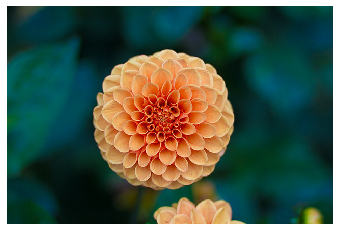

In [6]:
plot_image(flower)

In [7]:
china.shape

(427, 640, 3)

In [8]:
image.shape

(70, 120, 3)

In [9]:
image_grayscale.shape

(70, 120)

In [10]:
image_grayscale

array([[ 50.333332,  98.333336,  98.666664, ...,  90.      ,  57.      ,
         99.333336],
       [ 56.333332, 108.333336,  96.      , ...,  90.666664,  66.333336,
         68.666664],
       [ 47.666668, 116.666664, 105.666664, ...,  94.      ,  65.333336,
         64.333336],
       ...,
       [ 20.333334,  18.666666,  17.666666, ...,  19.      ,  22.333334,
         21.333334],
       [ 14.666667,  19.333334,  20.      , ...,  15.      ,  18.666666,
         18.333334],
       [ 16.      ,  15.666667,  24.      , ...,  20.333334,  14.      ,
         17.666666]], dtype=float32)

In [11]:
image

array([[[ 68,  39,  44],
        [109,  90,  96],
        [101,  97,  98],
        ...,
        [124,  72,  74],
        [ 90,  40,  41],
        [136,  82,  80]],

       [[ 74,  45,  50],
        [119, 100, 106],
        [ 98,  93,  97],
        ...,
        [125,  74,  73],
        [ 94,  52,  53],
        [102,  54,  50]],

       [[ 62,  41,  40],
        [127, 111, 112],
        [112, 102, 103],
        ...,
        [122,  81,  79],
        [ 93,  51,  52],
        [ 92,  50,  51]],

       ...,

       [[ 33,  13,  15],
        [ 32,   9,  15],
        [ 33,   8,  12],
        ...,
        [ 38,   5,  14],
        [ 41,  12,  14],
        [ 38,  14,  12]],

       [[ 28,   5,  11],
        [ 35,   8,  15],
        [ 38,   9,  13],
        ...,
        [ 29,   7,   9],
        [ 33,  12,  11],
        [ 32,  12,  11]],

       [[ 30,   8,  10],
        [ 32,   5,  10],
        [ 42,  13,  17],
        ...,
        [ 39,  10,  12],
        [ 32,   9,   1],
        [ 35,  12,   6]]

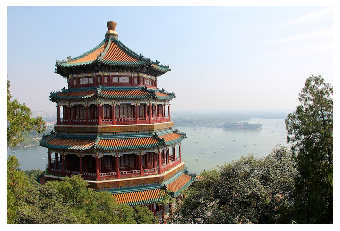

In [12]:
plot_image(china)

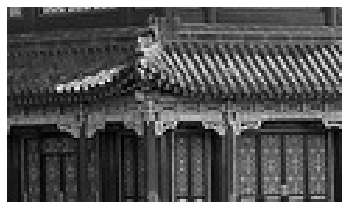

In [13]:
plot_image(image_grayscale)

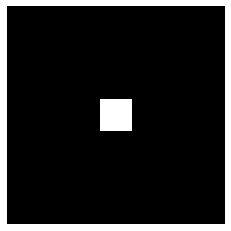

In [14]:
fmap = np.zeros(shape=(7, 7, 1, 3), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
fmap[3, 3, 0, 2] = 1

plot_image(fmap[:, :, 0, 2])
plt.show()
# plot_image(fmap[:, :, 0, 1])
# plt.show()

In [15]:
filter1 = [[1,    0],  
           [ 0,   1]]
#=>        [[[1], [0]], 
#           [[0], [1]]]

filter2 = [[0, 2], 
           [2, 0]]
#=>filter2= [[[0], [2]], 
#           [[2], [0] ]]


#=>        [[[ [1,0] ], [ [0,2] ]], 
#           [[[0, 2]], [[1, 0]]]]


In [16]:
fmap

# Rows, columns, , batch_size

array([[[[0., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]],

        [[1., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]]],


       [[[0., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]],

        [[1., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]]],


       [[[0., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]],

        [[1., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]]],


       [[[0., 1., 0.]],

        [[0., 1., 0.]],

        [[0., 1., 0.]],

        [[1., 1., 1.]],

        [[0., 1., 0.]],

        [[0., 1., 0.]],

        [[0., 1., 0.]]],


       [[[0., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]],

        [[1., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]]],


       [[[0., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]],

        [[1., 0., 0.]],

        [[0., 0

In [17]:
fmap[:, :, 0, 0]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [18]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
# [image1, image2 ...]
# [[i1_row1, i1_row2], [i2_row1, i2_row2] ...]
# [[ [i1_r1_col1, i1_r1_col2...], [i1_r2_col1, i1_r2_col2...]], [i2_row1, i2_row2] ...]
# [[ [ [i1_r1_col1_r, i1_r1_col1_g, i1_r1_col1_b], i1_r1_col2...], [i1_r2_col1, i1_r2_col2...]], [i2_row1, i2_row2] ...]
# [[ [ [i1_r1_col1_grey], [i1_r1_col2_grey]...], [i1_r2_col1, i1_r2_col2...]], [i2_row1, i2_row2] ...]
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME")

In [19]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

In [20]:
tf.nn.conv2d?

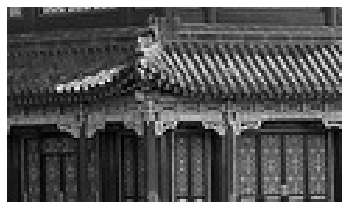

In [21]:
plot_image(images[0, :, :, 0])
plt.show()

In [22]:
images.shape

(1, 70, 120, 1)

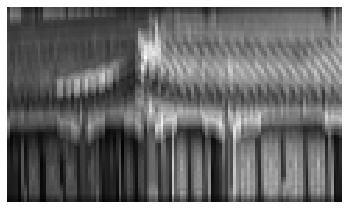

In [23]:
plot_image(output[0, :, :, 0])
plt.show()

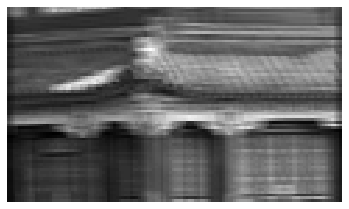

In [24]:
plot_image(output[0, :, :, 1])
plt.show()

*Different Dimensions*

    + X - > count, height, width, color_channel
    + fmap -> row, col, color, count
    + output -> count, height, width, filter

In [25]:
output.shape #stride == 3

(1, 70, 120, 3)

In [26]:
output.shape #stride == 1

(1, 70, 120, 3)

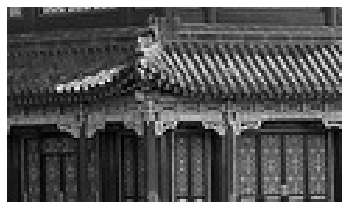

In [27]:
plot_image(output[0, :, :, 2])
plt.show()

In [28]:
TMP = np.array([[10, 15],
       [20, 30]])
TMP_4d = TMP.reshape(1, 2, 2, 1)

In [29]:
TMP_4d

array([[[[10],
         [15]],

        [[20],
         [30]]]])

## Simple example

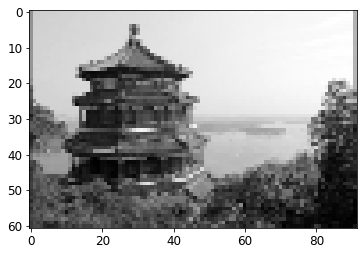

In [30]:
import numpy as np
from sklearn.datasets import load_sample_images

# Load sample images
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 4), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line
filters[3, 3, :, 2] = 1  # single dot

filters[3, :, :, 3] = 1  # plus
filters[:, 3, :, 3] = 1  # plus

# Create a graph with input X plus a convolutional layer applying the 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,7,7,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

plt.imshow(output[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

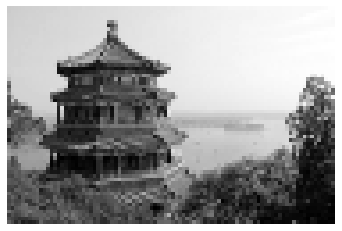

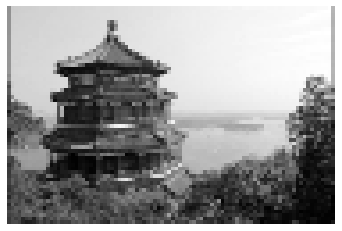

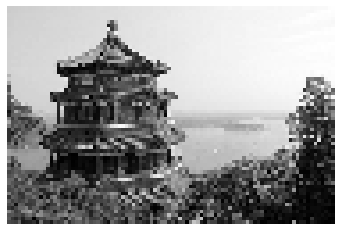

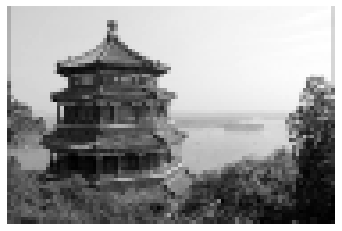

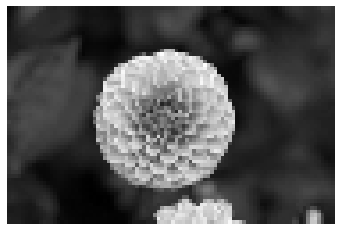

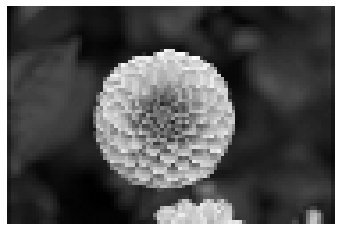

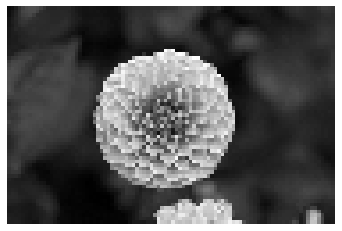

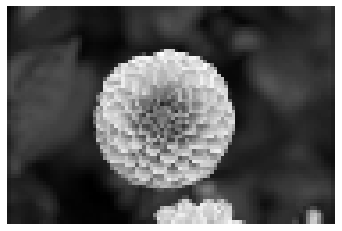

In [31]:
for image_index in (0, 1):
    for feature_map_index in (0, 1, 2, 3):
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()

Using `tf.layers.conv2d()`:

In [32]:
reset_graph()

X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2,2],
                        padding="SAME")

W0528 13:23:52.813581 140054774486848 deprecation.py:323] From <ipython-input-32-819ace688125>:5: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W0528 13:23:52.820499 140054774486848 deprecation.py:506] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [33]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X: dataset})

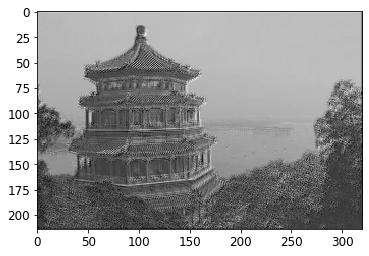

In [34]:
plt.imshow(output[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

## VALID vs SAME padding

In [35]:
reset_graph()

filter_primes = np.array([2., 3., 5., 7., 11., 13.], dtype=np.float32)
x = tf.constant(np.arange(1, 13+1, dtype=np.float32).reshape([1, 1, 13, 1]))
filters = tf.constant(filter_primes.reshape(1, 6, 1, 1))

valid_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='VALID')
same_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='SAME')

with tf.Session() as sess:
    print("VALID:\n", valid_conv.eval())
    print("SAME:\n", same_conv.eval())

VALID:
 [[[[184.]
   [389.]]]]
SAME:
 [[[[143.]
   [348.]
   [204.]]]]


In [36]:
print("VALID:")
print(np.array([1,2,3,4,5,6]).T.dot(filter_primes))
print(np.array([6,7,8,9,10,11]).T.dot(filter_primes))
print("SAME:")
print(np.array([0,1,2,3,4,5]).T.dot(filter_primes))
print(np.array([5,6,7,8,9,10]).T.dot(filter_primes))
print(np.array([10,11,12,13,0,0]).T.dot(filter_primes))


VALID:
184.0
389.0
SAME:
143.0
348.0
204.0


# Pooling layer

In [37]:
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

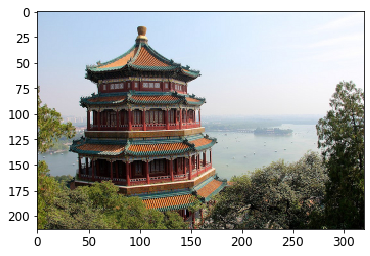

In [38]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.avg_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

plt.imshow(output[0].astype(np.uint8))  # plot the output for the 1st image
plt.show()

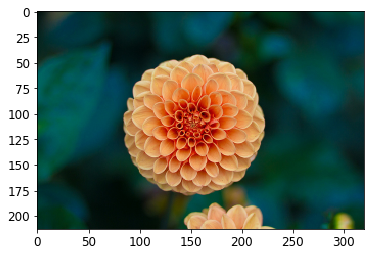

In [39]:
plt.imshow(output[1].astype(np.uint8))  # plot the output for the 1st image

In [40]:
output.shape

(2, 213, 320, 3)

In [41]:
dataset.shape

(2, 427, 640, 3)

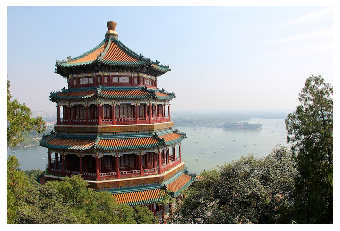

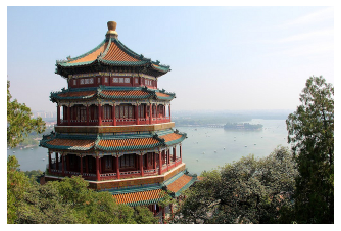

In [42]:
plot_color_image(dataset[0])
plt.show()
    
plot_color_image(output[0])
plt.show()

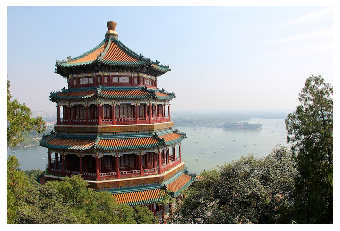

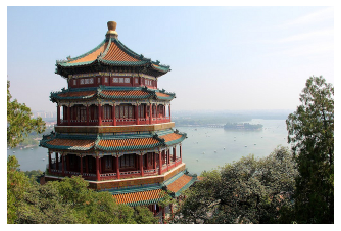

In [43]:
plot_color_image(dataset[0])
plt.show()
    
plot_color_image(output[0])
plt.show()

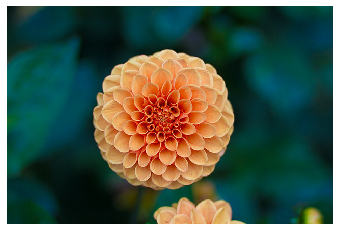

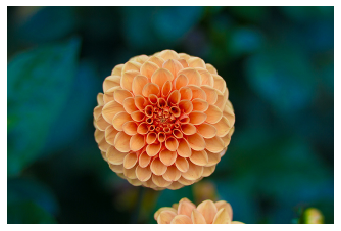

In [44]:
plot_color_image(dataset[1])
plt.show()
    
plot_color_image(output[1])
plt.show()

# Let's train MNIST dataset using CNN

Note: instead of using the `fully_connected()`, `conv2d()` and `dropout()` functions from the `tensorflow.contrib.layers` module, we now use the `dense()`, `conv2d()` and `dropout()` functions (respectively) from the `tf.layers` module. This is preferable because anything in contrib may change or be deleted without notice, while `tf.layers` is part of the official API. As you will see, the code is mostly the same.

For all these functions:
* the `scope` parameter was renamed to `name`, and the `_fn` suffix was removed in all the parameters that had it (for example the `activation_fn` parameter was renamed to `activation`).

The other main differences in `tf.layers.dense()` are:
* the `weights` parameter was renamed to `kernel` (and the weights variable is now named `"kernel"` rather than `"weights"`),
* the default activation is `None` instead of `tf.nn.relu`

The other main differences in `tf.layers.conv2d()` are:
* the `num_outputs` parameter was renamed to `filters`,
* the `stride` parameter was renamed to `strides`,
* the default `activation` is now `None` instead of `tf.nn.relu`.

The other main differences in `tf.layers.dropout()` are:
* it takes the dropout rate (`rate`) rather than the keep probability (`keep_prob`). Of course, `rate == 1 - keep_prob`,
* the `is_training` parameters was renamed to `training`.

In [45]:
height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps

n_fc1 = 64
n_outputs = 10

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X") # None, 784
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels]) # None, 28, 28, 1
    y = tf.placeholder(tf.int32, shape=[None], name="y") # [None]

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")



# conv1 -> None, 28, 28, 32
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

# conv2 -> None, 14, 14, 64

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    # pool3 -> None, 7, 7, 64
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])
    #pool3_flat -> None, 64*7*7

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

W0528 13:23:56.124134 140054774486848 deprecation.py:323] From <ipython-input-45-ef3e15d6d981>:48: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.


In [46]:
myarray = np.array([[1, 2], [3, 4]])
myarray.reshape(2, 2, 1)

array([[[1],
        [2]],

       [[3],
        [4]]])

In [47]:
# We could use the classic MNIST
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/mnist")

W0528 13:23:57.767110 140054774486848 deprecation.py:323] From <ipython-input-47-ab5d01a05808>:3: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0528 13:23:57.768111 140054774486848 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0528 13:23:57.770512 140054774486848 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future v

Extracting data/mnist/train-images-idx3-ubyte.gz


W0528 13:23:58.124220 140054774486848 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0528 13:23:58.302478 140054774486848 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Extracting data/mnist/train-labels-idx1-ubyte.gz
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz


## Or We could use the fahion MNIST
## We just need to load different dataset

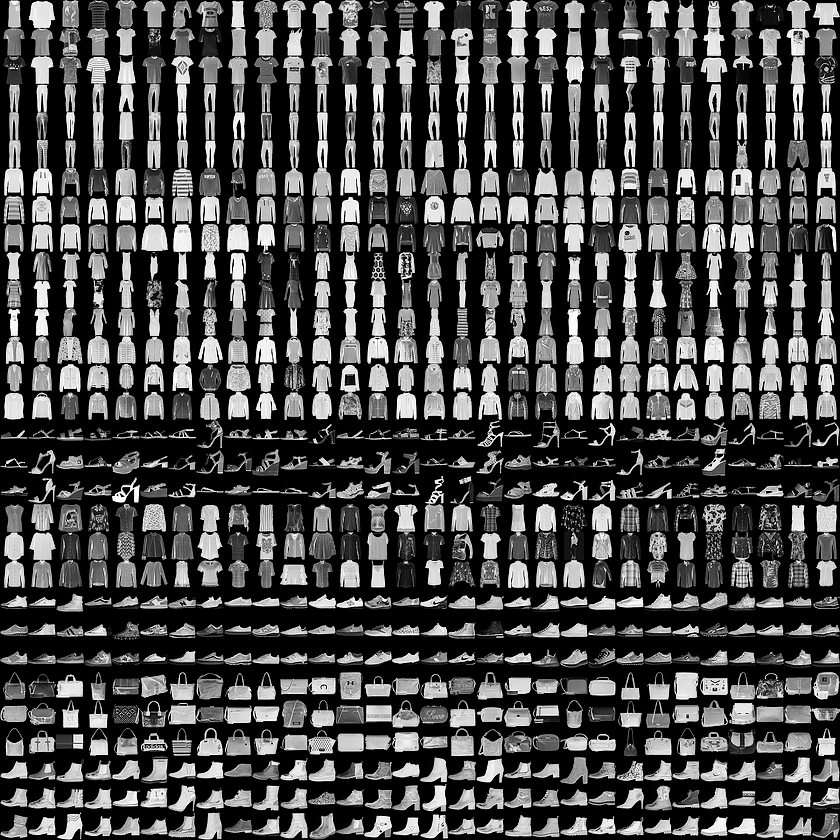

In [48]:
# Fashion - MNIST - https://github.com/zalandoresearch/fashion-mnist
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/fashion")

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [49]:
X_batch, y_batch = mnist.train.next_batch(batch_size)

In [50]:
X_batch.shape

(2, 784)

In [51]:
y_batch

array([8, 9], dtype=uint8)

In [52]:
y_batch.shape

(2,)

In [53]:
X_reshaped = X_batch.reshape((-1, 28, 28))

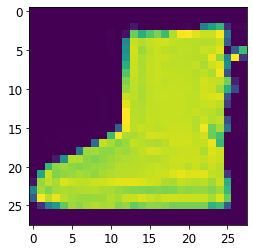

In [54]:
plt.imshow(X_reshaped[1])

In [55]:
n_epochs = 10
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "model_ckps/my_mnist_model")

0 Train accuracy: 0.81 Test accuracy: 0.8645
1 Train accuracy: 0.93 Test accuracy: 0.8863
2 Train accuracy: 0.87 Test accuracy: 0.8991
3 Train accuracy: 0.93 Test accuracy: 0.905
4 Train accuracy: 0.93 Test accuracy: 0.9084
5 Train accuracy: 0.94 Test accuracy: 0.9075
6 Train accuracy: 0.98 Test accuracy: 0.9119
7 Train accuracy: 0.96 Test accuracy: 0.9104
8 Train accuracy: 0.95 Test accuracy: 0.918
9 Train accuracy: 0.97 Test accuracy: 0.9062


In [56]:
## Fashion MNIST - Compare the results
# In 10 iterations we are able to reacg an accuracy of 91%
# The best acuracy using sklearn is 88% (With SVC) as per 
# http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/#

In [57]:
import tensorflow as tf
from tensorflow.keras import layers

In [58]:
print(tf.VERSION)
print(tf.keras.__version__)

1.14.0
2.2.4-tf


In [59]:
model = tf.keras.Sequential([
# Adds a densely-connected layer with 64 units to the model:
layers.Dense(64, activation='relu', input_shape=(32,)),
# Add another:
layers.Dense(64, activation='relu'),
# Add a softmax layer with 10 output units:
layers.Dense(10, activation='softmax')])

model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [61]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [62]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [63]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [64]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 65us/sample - loss: 2.4654 - acc: 0.6577
Epoch 2/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.7238 - acc: 0.7319
Epoch 3/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.6328 - acc: 0.7621
Epoch 4/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.5963 - acc: 0.7796
Epoch 5/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.5659 - acc: 0.7922


In [66]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.5958 - acc: 0.7993

Test accuracy: 0.7993


In [67]:
predictions = model.predict(test_images)